In [2]:
import pandas as pd
from matplotlib import pyplot as plt

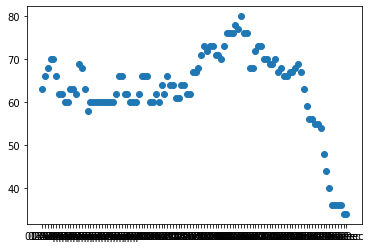

In [3]:
df = pd.read_csv('potato.csv')
array=df['p/kg'].tolist()
array
plt.scatter(df['Date'],array)
plt.show()


In [4]:
labels=df['Arrival']
relative_change=[]
temp=[]
for i in range(1,len(labels)):
    result=(labels[i]-labels[i-1])/labels[i-1]
    relative_change.append(result)
    label=-2
    if result>0:
        label=1
    elif result==0:
        label=0
    else:
        label=-1
    temp.append(label)
relative_change.append(0)
new_temp = [0]+temp
new_temp

[0,
 -1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 0,
 0,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 0,
 0,
 0,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1]

In [5]:
df['yms']=new_temp
df['relative_change']=relative_change
df.tail(20)
# df.to_csv('result.csv')

,Date,p/kg,Arrival,yms,relative_change
88,28-Nov,67,2400,1,0.041667
89,29-Nov,68,2500,1,-0.120000
90,30-Nov,69,2200,-1,1.363636
91,01-Dec,67,5200,1,-0.009615
92,02-Dec,63,5150,-1,0.320388
93,03-Dec,59,6800,1,0.117647
94,04-Dec,56,7600,1,0.302632
95,05-Dec,56,9900,1,-0.277778
96,06-Dec,55,7150,-1,-0.384615
97,07-Dec,55,4400,-1,0.204545


In [6]:
from sklearn.model_selection import train_test_split
df2=df.iloc[:93]
training_data,testing_data=train_test_split(df,test_size=0.05,shuffle=False)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")
# training_data.tail(5)

No. of training examples: 102
No. of testing examples: 6


In [7]:
X_train,Y_train,X_test,Y_test=training_data[['p/kg','Arrival']],training_data['yms'],testing_data[['p/kg','Arrival']],testing_data['yms']
# X_train=X_train.append(pd.Series([65],index=[92]))
# X_test=X_test[1:]

X_train=X_train.to_numpy()
Y_train=Y_train.to_numpy()
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()
print(type(X_test))

<class 'numpy.ndarray'>


In [8]:
import numpy as np
def euclidean_dist(X_test, X_train):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    a = np.zeros(num_test)
    b = np.zeros(num_train)
    for i in range(num_test):
        a[i] = np.dot(X_test[i], X_test[i])
    for j in range(num_train):
        b[j] = np.dot(X_train[j], X_train[j])  
    for i in range(num_test):
        for j in range(num_train):
            dists[i, j] = a[i] + b[j] - 2 * np.dot(X_test[i], X_train[j])
    

    return dists
    

print(len(X_test))
dicts=euclidean_dist(np.array(X_test[:1]),X_train)


6


In [9]:
# k neareast neighbour
def find_k_neighbors(dists, Y_train, k):
    num_test = dists.shape[0]
    neighbors = np.zeros((num_test, k))
    sorted_idx = dists.argsort(axis=1)
    for i in range(num_test):
        neighbors[i] = Y_train[sorted_idx[i][:k]]
    return neighbors

neighbours=find_k_neighbors(dicts,Y_train,5)
neighbours

array([[-1., -1.,  1.,  0.,  1.]])

In [12]:
def knn_predict(X_test, X_train, Y_train, k):
    num_test = X_test.shape[0]
    Y_pred = np.zeros(num_test, dtype=int)
    dists = euclidean_dist(X_test, X_train)
    neighbors = find_k_neighbors(dists, Y_train, k)

    for i in range(num_test):
        value, counts = np.unique(neighbors[i], return_counts=True)
        idx = np.argmax(counts)
        Y_pred[i] = value[idx]
        if len(X_test)>0:
            
            print(type(X_test[0].shape))
            print(type(X_train))
            new_dist=euclidean_dist(X_test[:1],X_train)
           
            np.append(dicts,new_dist[0])
            
            Y_train=np.append(Y_train, Y_pred[i])
            # print(Y_train.tail(5))
            neighbors = find_k_neighbors(dists, Y_train, k)
            X_train=np.append(X_train, X_test[:1])
            X_test=X_test[1:]
    
    return Y_pred
k=2
Y_pred = knn_predict(X_test, X_train, Y_train, k)


<class 'tuple'>
<class 'numpy.ndarray'>
<class 'tuple'>
<class 'numpy.ndarray'>


ValueError: setting an array element with a sequence.

In [32]:

k=5
Y_pred = knn_predict(X_test, X_train, Y_train, k)


[[ 97  92  91  99  98 100 101  85  89  93  88  83  87  90  96  82  94  86
   84  81  73  78  70  19  66  63  74  67   0   3  79  15  80  64  72  54
    4  65  68  18  22  49  50   2  13  71  69  53  16   6   5  75  76  59
   57  30  52  12  45  37   1  55  56  48  60  11  31  32  33  23  41   7
   43  51  40  42  28  77  10  46  20   8  24  34  44  14  61  62  39  27
   21  17   9  25  47  29  35  36  38  26  58  95]
 [ 97 101  92  91  99  98 100  85  89  88  83  87  90  82  93  86  96  84
   81  73  94  78  70  19  66  63  74  67   0   3  79  15  80  64  72  54
    4  65  68  18  22  49  50   2  13  71  69  53  16   6   5  75  76  59
   57  30  52  12  45  37   1  55  56  48  60  11  31  32  33  23  41   7
   43  51  40  42  28  77  10  46  20   8  24  34  44  14  61  62  39  27
   21  17   9  25  47  29  35  36  38  26  58  95]
 [101  97  85  89  92  83  88  91  99  98  87  90 100  82  86  84  81  73
   93  78  70  19  66  63  74  67   0   3  79  15  80  64  72  54   4  65
   68  18 

In [33]:
def compute_error_rate(ypred, ytrue):
  
  error_rate=0
  err = 0
  num_test=len(ypred)
  for i in range(num_test):
      err = err + (ypred[i] != ytrue[i])  
  error_rate = err / num_test * 100
  return error_rate
  
ypred=Y_pred.tolist()
ytrue=Y_test.tolist()
print('eficiency: ',100-compute_error_rate(ypred,ytrue))

eficiency:  83.33333333333334


In [34]:
ytrue

[1, -1, -1, 1, -1, 1]

In [35]:
ypred

[-1, -1, -1, 1, -1, 1]

In [15]:
df.iloc[86]

Date                 26-Nov
p/kg                     66
yms                       0
relative_change    0.015152
Name: 86, dtype: object